In [1]:
%matplotlib inline

import importlib
import numpy as np
import scipy as sp
from scipy.special import cbrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from Brownian import *
from fmesh import *
from Integrator import *
from QoI import *
from adjoint import *
from types import MethodType

In [2]:
N = 10**5
l = 0.1
dt = 0.1
Nt = 100
test = Brownian(N,l,dt)
testInt = TimeIntegrator(test,Nt)
testQoI = QoI(N,Nt)

In [3]:
testInt.forward(test)

In [4]:
testQoI.compute_J(testInt)
J0 = testQoI.J
D = l*l/4.0/dt
print J0, 2*D*Nt*dt

0.50445240104 0.5


In [5]:
Nt*l

10.0

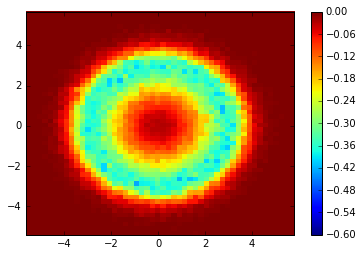

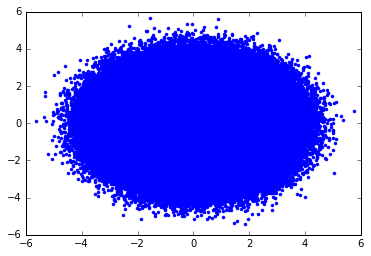

10.1279995304


In [14]:
testAdjPdf = adj_particle(test)
testInt.backward(testAdjPdf,testQoI)
plt.figure(1)
plt.hist2d(testAdjPdf.x,testAdjPdf.y,weights=testAdjPdf.spwt,bins=50,vmin=-0.6)
plt.colorbar()
plt.figure(2)
plt.plot(testAdjPdf.x,testAdjPdf.y,'.')
plt.show()
print testQoI.dJdA

10.2651316508


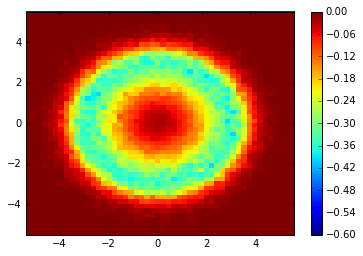

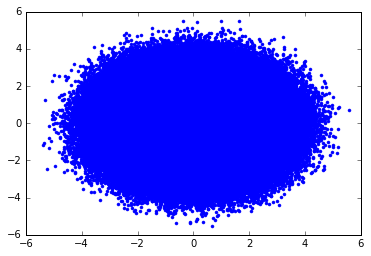

In [7]:
testAdjPdf = adj_particle(test)
testQoI.compute_dJ_pdf = dJ_pdf_vw
testQoI.compute_dJ_pdf = MethodType(dJ_pdf_vw, testQoI, QoI)
testInt.backward(testAdjPdf,testQoI)
plt.figure(3)
plt.hist2d(testAdjPdf.x,testAdjPdf.y,weights=testAdjPdf.spwt,bins=50,vmin=-0.6)
plt.colorbar()
plt.figure(4)
plt.plot(testAdjPdf.x,testAdjPdf.y,'.')
print testQoI.dJdA

In [8]:
W = 6.
Ng = 16
dx = W/Ng
n = Nt-1
qmesh = mesh(Ng,W,W)
#original/adjoint pdf
pg = qmesh.ptc2pdf(testInt.xData[n,:],testInt.yData[n,:])
pg_hat = qmesh.ptc2pdf(testAdjPdf.x,testAdjPdf.y,testAdjPdf.spwt)
#Gradients of pg
pg_dx, pg_dy = qmesh.pdfgrad(pg)
pg_dx, pg_dy = np.asarray(pg_dx), np.asarray(pg_dy)
#Gradients of pg_hat
pg_hat_dx, pg_hat_dy = qmesh.pdfgrad(pg_hat)
pg_hat_dx, pg_hat_dy = np.asarray(pg_hat_dx), np.asarray(pg_hat_dy)

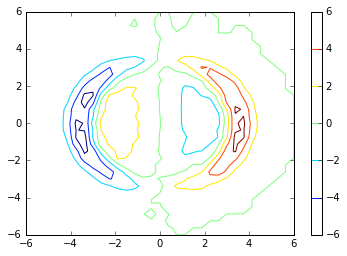

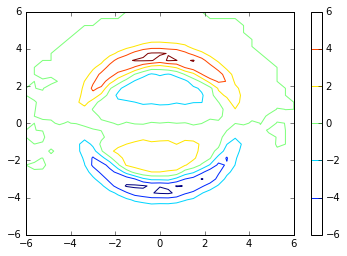

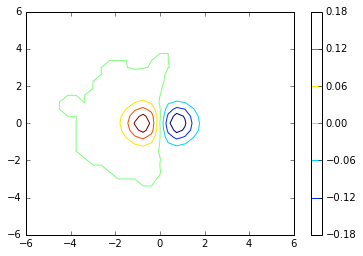

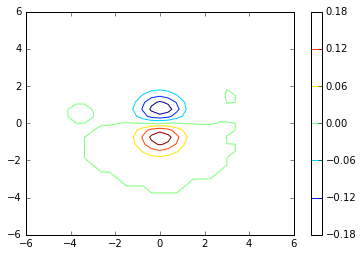

In [9]:
plt.figure(1)
plt.contour(qmesh.xg,qmesh.yg,pg_hat_dx)
plt.colorbar()
plt.figure(2)
plt.contour(qmesh.xg,qmesh.yg,pg_hat_dy)
plt.colorbar()
plt.figure(3)
plt.contour(qmesh.xg,qmesh.yg,pg_dx)
plt.colorbar()
plt.figure(4)
plt.contour(qmesh.xg,qmesh.yg,pg_dy)
plt.colorbar()

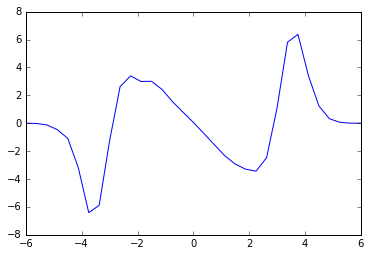

In [10]:
plt.figure(5)
plt.plot(qmesh.xg,pg_hat_dx[Ng,:])